In [1]:
"""
GRASP calculation for GRAMS
@aurthor Jiancheng Zeng
@September 20 2021

"""

'\nGRASP calculation for GRAMS\n@aurthor Jiancheng Zeng\n@September 20 2021\n\n'

[       nan        nan 0.01204013 0.0197376  0.01720813 0.01064662
 0.00678118 0.00414881 0.00262694 0.00157957 0.00095703 0.00071086
 0.00037699 0.00012566        nan]


/var/folders/jy/kzbmcbld7cxb685lxm7tb8p80000gn/T/ipykernel_63091/3031033605.py:32: RuntimeWarning: invalid value encountered in true_divide
  antiprotonerror = antiprotonY / np.sqrt(np.array(antiprotonEvents))


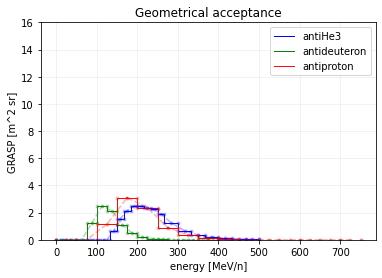

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
"""
input data for antiHe3, antiHe3X for the energy range, antiHe3Y for the GRASP
"""
antiHe3X = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
antiHe3X = np.array(antiHe3X)/3
antiHe3Y = [0, 0, 0, 0, 0, 0, 0, 0, 0.646916759, 1.554460045, 2.146713092, 2.463636959, 2.482235187, 2.376175019, 2.234300695, 1.908580369, 1.257391044, 0.660488439, 0.348968112, 0.209104407, 0.112846008, 0.059815924, 0.030661944]
centersantiHe3X = antiHe3X[:-1] + np.diff(antiHe3X) / 2
antiHe3error = np.array(antiHe3Y) ** 2

"""
input data for antideuteron, antideuteronX for the energy range, antideuteronY for the GRASP
"""
antideuteronX = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
antideuteronX = np.array(antideuteronX)/2
antideuteronY = [0, 0, 0, 1.210392818, 2.457605101, 2.150985658, 1.125821143, 0.48418226, 0.200684939, 0.087461939, 0.035814156, 0.012315043, 0.004146902, 0.001884956, 0.000376991, 0.000251327]
centersantideuteronX = antideuteronX[:-1] + np.diff(antideuteronX) / 2
antideuteronerror = np.array(antideuteronY) **2

"""
input data for antiproton, antiprotonX for the energy range, antiprotonY for the GRASP
"""
antiprotonX = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]
antiprotonEvents = [0, 0, 9180, 24670, 18752, 7178, 2912, 1090, 437, 158, 58, 32, 9, 1, 0]
antiprotonY = np.array(antiprotonEvents) * math.pi * 400 / 1e7
#antiprotonY = [0, 0, 1.153592822, 3.100123631, 2.356445818, 0.902014083, 0.365932712, 0.13697344, 0.05491504, 0.019854866, 0.007288495, 0.004021239, 0.001130973, 0.000125664, 0]
centersantiprotonX = antiprotonX[:-1] + np.diff(antiprotonX) / 2
#antiprotonerror = np.array(antiprotonY) ** 2
antiprotonerror = antiprotonY / np.sqrt(np.array(antiprotonEvents))

print(antiprotonerror)

"""
stair plot for antiHe3
"""
plt.stairs(antiHe3Y , antiHe3X, baseline=None, label='antiHe3', color='b', alpha=0.99)
plt.plot(centersantiHe3X, antiHe3Y, '.--', color='b', alpha=0.3)
plt.plot(np.repeat(antiHe3X, 2), np.hstack([antiHe3Y[0], np.repeat(antiHe3Y, 2), antiHe3Y[-1]]),
         '.', color='b', alpha=0.23)

"""
stair plot for antideuteron
"""
plt.stairs(antideuteronY , antideuteronX, baseline=None, label='antideuteron', color='g', alpha=0.98)
plt.plot(centersantideuteronX, antideuteronY, '.--', color='g', alpha=0.3)
plt.plot(np.repeat(antideuteronX, 2), np.hstack([antideuteronY[0], np.repeat(antideuteronY, 2), antideuteronY[-1]]),
         '.', color='g', alpha=0.22)
#plt.errorbar(centersantideuteronX, antideuteronY, color = 'g', yerr = 0.1, ls = 'none')

"""
stair plot for antiproton
"""
plt.stairs(antiprotonY , antiprotonX, baseline=None, label='antiproton', color='r',  alpha=0.97)
plt.plot(centersantiprotonX, antiprotonY, '.--', color='r', alpha=0.3)
plt.plot(np.repeat(antiprotonX, 2), np.hstack([antiprotonY[0], np.repeat(antiprotonY, 2), antiprotonY[-1]]),
         '.', color='r', alpha=0.21)
plt.errorbar(centersantiprotonX, antiprotonY , color='r',  yerr = antiprotonerror, ls = 'none')

plt.xlabel("energy [MeV/n]")
plt.ylabel("GRASP [m^2 sr]")
plt.ylim(0,16)
plt.legend()
plt.grid(alpha=0.2)
plt.title('Geometrical acceptance')
plt.savefig("./Geometrical acceptance.jpg")
